In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt
from matplotlib.font_manager import FontProperties

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection


%matplotlib inline

In [9]:
dem_dates = ('skip',  'skip',   'Oct.', 'Nov.', 'Dec.', 'Jan.', 'Feb.', 'Feb.', 'AVERAGE',   'Mar.', 'Mar.', 'Apr.', 'Sep.', 'Oct.')
rep_dates = ('Aug', 'Sep.', 'Oct.', 'Nov.', 'Dec.', 'Jan.', 'Feb.', 'Feb.', 'Feb.', 'Mar.', 'Mar.', 'AVERAGE',  'Sep.', 'Oct.')
MASTER_DATES = ('Aug', 'Sep.', 'Oct.', 'Nov.', 'Dec.', 'Jan.', 'Feb.', 'Feb.', 'Feb.', 'Mar.', 'Mar.', 'Apr.', 'Sep.', 'Oct.', 'Oct.')

### Q1

In [10]:
def calc_avg(list1): 
    return sum(list1) / len(list1)

In [11]:
trump_p_f = [0.15, 0.15, 0.03, 0.05, 0.11, 0.15, 0.06, 0.18, 0.24, 0.29, 0.13]
trump_g_f = [0.09, .11, .11]
t_p_avg = calc_avg(trump_p_f)
t_g_avg = calc_avg(trump_g_f)

clinton_p_f = [0.11, 0.0, 0.06, -0.05, -0.03, -0.04, -0.01, -0.03, -.02]
clinton_g_f = [-.09, -.11, -.11]
c_p_avg = calc_avg(clinton_p_f)
c_g_avg = calc_avg(clinton_g_f)

In [12]:
#ADJUSTED
clinton_f_adj = [c_p_avg, c_p_avg, 0.11, 0.0, 0.06, -0.05, -0.03, -0.04, c_p_avg, -0.01, -0.03, -.02, -.09, -.11, -.11]
trump_f_adj = [0.15, 0.15, 0.03, 0.05, 0.11, 0.15, 0.06, 0.18, 0.24, 0.29, 0.13, t_p_avg, 0.09, .11, .11]
print len(clinton_f_adj), len(trump_f_adj)

15 15


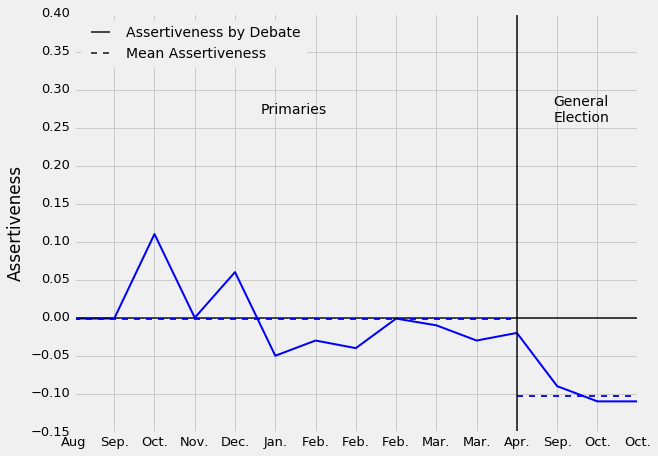

In [13]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(9, 7))
ax1.plot(clinton_f_adj, color='blue', lw=2)

ax1.set_ylim([-.15, .4])
ax1.axhline(0, color='black', alpha=0.7, linestyle = "-", lw=2)

ax1.axhline(c_p_avg, color='blue', alpha=0.9, linestyle = "--", xmax = 11.0/14-.01, lw=2)
ax1.axhline(c_g_avg, color='blue', alpha=0.9, linestyle = "--", xmin = 11.0/14, lw=2)

ax1.text(.39, .77,'Primaries', ha='center', va='center', transform=ax1.transAxes, fontsize=14)
ax1.text(.9, .79,'General', ha='center', va='center', transform=ax1.transAxes, fontsize=14)
ax1.text(.9, .75,'Election', ha='center', va='center', transform=ax1.transAxes, fontsize=14)

ax1.axvline(11, color='black', alpha=0.7, linestyle = "-", lw=2, label = 'Assertiveness by Debate')
ax1.axvline(11, color='black', alpha=0.7, linestyle = "--", lw=.01, label = 'Mean Assertiveness')

ax1.locator_params(nbins=15)
ax1.set_xticklabels(MASTER_DATES)
ax1.set_ylabel('Assertiveness')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tick_params(axis='both', which='minor', labelsize=13)
leg = plt.legend(loc = 'upper left', prop={'size':14})

for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

# plt.savefig('graphs/clinton_q1.eps', format='eps', dpi=2000)

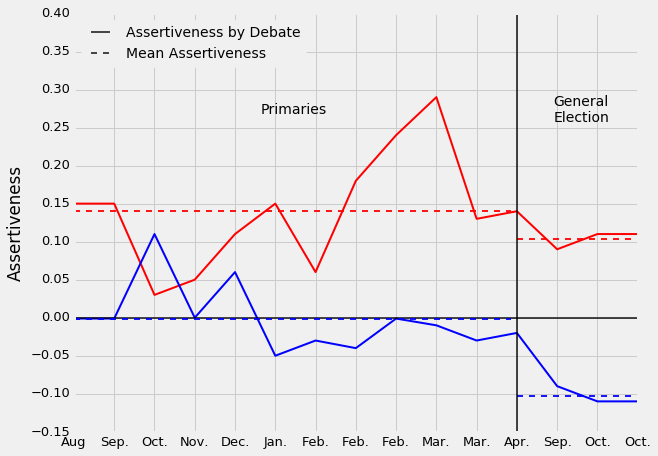

In [14]:
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(9, 7))

ax1.plot(trump_f_adj, color='red', lw=2)
ax1.plot(clinton_f_adj, color='blue', lw=2)
# ax1.plot(obama08_f_adj, color='green', lw=2)
# ax1.plot(mccain08_f_adj, color='orange', lw=2)

ax1.set_ylim([-.15, .4])
ax1.axhline(0, color='black', alpha=0.7, linestyle = "-", lw=2)

ax1.axhline(t_p_avg, color='red', alpha=0.9, linestyle = "--", xmax = 11.0/14-.01, lw=2)
ax1.axhline(t_g_avg, color='red', alpha=0.9, linestyle = "--", xmin = 11.0/14, lw=2)
ax1.axhline(c_p_avg, color='blue', alpha=0.9, linestyle = "--", xmax = 11.0/14-.01, lw=2)
ax1.axhline(c_g_avg, color='blue', alpha=0.9, linestyle = "--", xmin = 11.0/14, lw=2)

ax1.axvline(11, color='black', alpha=0.7, linestyle = "-", lw=2, label = 'Assertiveness by Debate')
ax1.axvline(11, color='black', alpha=0.7, linestyle = "--", lw=.01, label = 'Mean Assertiveness')

ax1.text(.39, .77,'Primaries', ha='center', va='center', transform=ax1.transAxes, fontsize=14)
ax1.text(.9, .79,'General', ha='center', va='center', transform=ax1.transAxes, fontsize=14)
ax1.text(.9, .75,'Election', ha='center', va='center', transform=ax1.transAxes, fontsize=14)

ax1.locator_params(nbins=15)
ax1.set_xticklabels(MASTER_DATES)
ax1.set_ylabel('Assertiveness')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tick_params(axis='both', which='minor', labelsize=13)
leg = plt.legend(loc = 'upper left', prop={'size':14})

for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

# plt.savefig('graphs/both_q1.eps', format='eps', dpi=2000)

### Q2

In [15]:
clinton_s = [0.46059628777, 0.473386814837, 0.480774694166, 0.474977908127, 0.440111390254, 0.482383309171, 0.455660664221, 0.479662342358, 0.490279415132, 0.47652154346835224, 0.4895848559809599, 0.4989739504494516]
clinton_nltk = [0.510442829001, 0.514051874171]
c_avg_s = calc_avg(clinton_s)

trump_s = [0.502557720058, 0.510390216961, 0.520650906522, 0.522131608686, 0.524993261456, 0.525073009733, 0.501029188989,  0.491280828439, 0.515618648135, 0.492371497168, 0.533245212465, 0.5252667898750849, 0.5270328008493402, 0.4988171517237778]
trump_nltk = [0.428836133066, 0.409837037776]
t_avg_s = calc_avg(trump_s)

#ADJUSTED SUBJECTIVITY, each cand. now has 15 slots 
clinton_s_adj = [c_avg_s, c_avg_s, 0.46059628777, 0.473386814837, 0.480774694166, 0.474977908127, 0.440111390254, 0.482383309171, c_avg_s ,0.455660664221, 0.479662342358, 0.490279415132, 0.47652154346835224, 0.4895848559809599, 0.4989739504494516]
trump_s_adj = [0.502557720058, 0.510390216961, 0.520650906522, 0.522131608686, 0.524993261456, 0.525073009733, 0.501029188989,  0.491280828439, 0.515618648135, 0.492371497168, 0.533245212465, t_avg_s, 0.5252667898750849, 0.5270328008493402, 0.4988171517237778]

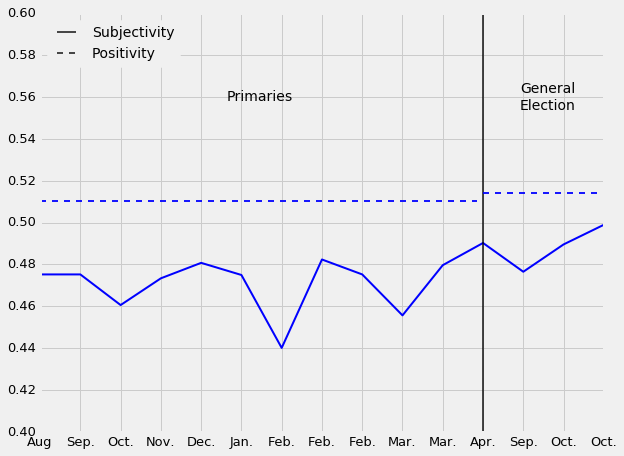

In [16]:
fig, ax1 = plt.subplots(figsize=(9, 7))

plt.style.use('fivethirtyeight')

ax1.plot(clinton_s_adj, color='blue', lw=2)

ax1.set_ylim([.4,.6])
ax1.axvline(11, color='black', alpha=0.7, linestyle = "-", lw=2, label = 'Subjectivity')
ax1.axvline(11, color='black', alpha=0.7, linestyle = "--", lw=.01, label = 'Positivity')

ax1.axhline(clinton_nltk[0], color='blue', alpha=0.9, linestyle = "--", xmax = 11.0/14-.01, lw=2)
ax1.axhline(clinton_nltk[1], color='blue', alpha=0.9, linestyle = "--", xmin = 11.0/14, lw=2)

ax1.text(.39, .80,'Primaries', ha='center', va='center', transform=ax1.transAxes, fontsize=14)
ax1.text(.9, .82,'General', ha='center', va='center', transform=ax1.transAxes, fontsize=14)
ax1.text(.9, .78,'Election', ha='center', va='center', transform=ax1.transAxes, fontsize=14)

ax1.locator_params(nbins=15)
ax1.set_xticklabels(MASTER_DATES)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tick_params(axis='both', which='minor', labelsize=13)
leg = plt.legend(loc = 'upper left', prop={'size':14})

for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
    
# plt.savefig('graphs/clinton_q2.eps', format='eps', dpi=2000)

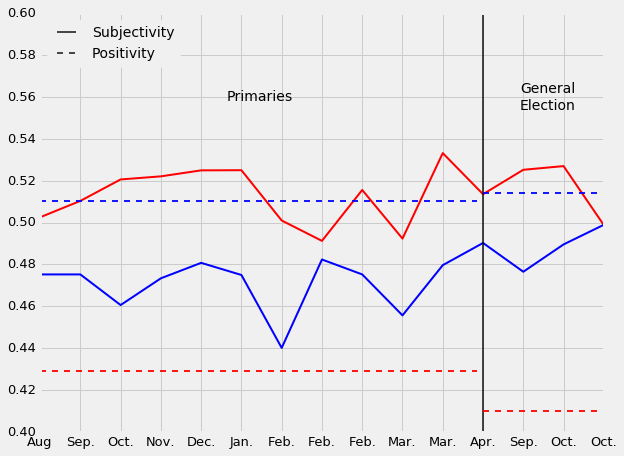

In [17]:
fig, ax1 = plt.subplots(figsize=(9, 7))

plt.style.use('fivethirtyeight')

ax1.plot(trump_s_adj, color='red', lw=2)
ax1.plot(clinton_s_adj, color='blue', lw=2)
# ax1.plot(obama_s, color='green', lw=2)
# ax1.plot(mccain_s, color='orange', lw=2)

ax1.set_ylim([.4,.6])
ax1.axvline(11, color='black', alpha=0.7, linestyle = "-", lw=2, label = 'Subjectivity')
ax1.axvline(11, color='black', alpha=0.7, linestyle = "--", lw=.01, label = 'Positivity')

ax1.axhline(trump_nltk[0], color='red', alpha=0.9, linestyle = "--", xmax = 11.0/14-.01, lw=2)
ax1.axhline(trump_nltk[1], color='red', alpha=0.9, linestyle = "--", xmin = 11.0/14, lw=2)

ax1.axhline(clinton_nltk[0], color='blue', alpha=0.9, linestyle = "--", xmax = 11.0/14-.01, lw=2)
ax1.axhline(clinton_nltk[1], color='blue', alpha=0.9, linestyle = "--", xmin = 11.0/14, lw=2)

# ax1.axhline(obama_nltk[0], color='green', alpha=0.9, linestyle = "--", xmax = 11.0/14-.01, lw=2)
# ax1.axhline(obama_nltk[1], color='green', alpha=0.9, linestyle = "--", xmin = 11.0/14, lw=2)

# ax1.axhline(mccain_nltk[0], color='orange', alpha=0.9, linestyle = "--", xmax = 11.0/14-.01, lw=2)
# ax1.axhline(mccain_nltk[1], color='orange', alpha=0.9, linestyle = "--", xmin = 11.0/14, lw=2)

ax1.text(.39, .80,'Primaries', ha='center', va='center', transform=ax1.transAxes, fontsize=14)
ax1.text(.9, .82,'General', ha='center', va='center', transform=ax1.transAxes, fontsize=14)
ax1.text(.9, .78,'Election', ha='center', va='center', transform=ax1.transAxes, fontsize=14)

ax1.locator_params(nbins=15)
ax1.set_xticklabels(MASTER_DATES)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tick_params(axis='both', which='minor', labelsize=13)
leg = plt.legend(loc = 'upper left', prop={'size':14})

for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
    
# plt.savefig('graphs/both_q2.eps', format='eps', dpi=2000)

Show Clinton's graphs first, then plot Trump on top. Explain with reference to Clinton what's happening, and then drop in Trump and note main differences.

### Q4

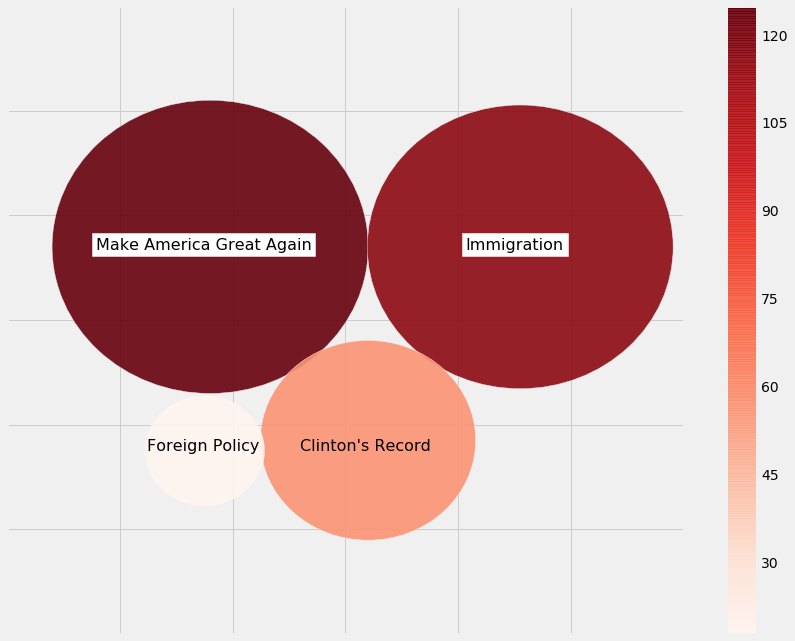

In [18]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(13.5, 10.5))

"""
PRIMARIES:: 4 TOPICS, ngram_range=(1,3)
1) Make America Great Again : 125
2) Immigration : 117 
3) Foreign Policy : 58 
4) Hillary's Record : 18 
"""
total = 125 + 117 + 58 + 18 
x1 = 125.0 / total 
x2 = 117.0 / total 
x3 = 58.0 / total 
x4 = 18.0 / total

x1_s = sqrt(x1*5)
x2_s = sqrt(x2*5)
x3_s = sqrt(x3*5)
x4_s = sqrt(x4*5)

patches = []
circles = [(-1.2, .7, x1_s), (1.55, .7, x2_s), (.2, -1.15, x3_s), (-1.25, -1.25, x4_s)]
for x1, y1, r in circles:
    circle = Circle((x1, y1), r, edgecolor='black')
    patches.append(circle)
ax.set_ylim([-3,3])
ax.set_xlim([-3,3])

colors = np.array([125, 117, 58, 18])

p = PatchCollection(patches, cmap=matplotlib.cm.Reds, alpha=.9)
p.set_array(np.array(colors))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.add_collection(p)
plt.colorbar(p)

ax.text(.29, .62,'Make America Great Again', ha='center', va='center', transform=ax.transAxes, fontsize=16, backgroundcolor='white', color = 'black')
ax.text(.75, .62,'Immigration', ha='center', va='center', transform=ax.transAxes, fontsize=16,backgroundcolor='white', color = 'black')
ax.text(.29, .3,'Foreign Policy', ha='center', va='center', transform=ax.transAxes, fontsize=16, color = 'black')
ax.text(.53, .3,'Clinton\'s Record', ha='center', va='center', transform=ax.transAxes, fontsize=16, color = 'black')

# plt.savefig('graphs/t_p_q4.eps', format='eps')

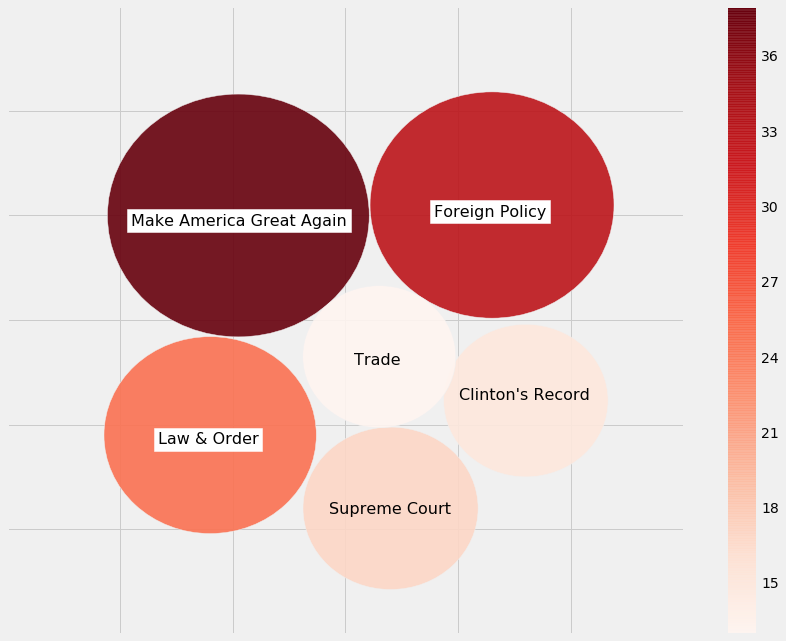

In [22]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(13.5, 10.5))

"""
GE:: 6 TOPICS, ngram_range=(1,2)
0) Trade
1) Make America Great Again (Immigration)
2) Foreign Policy
3) Clinton's Record
4) Law & Order
5) Supreme Court

Counter({1: 38, 2: 33, 4: 25, 5: 17, 3: 15, 0: 13})
"""
total = 38 + 33 + 25 + 17 + 15 + 13 
x1 = 38.0 / total
x2 = 33.0 / total 
x3 = 25.0 / total 
x4 = 17.0 / total
x5 = 15.0 / total
x6 = 13.0 / total

x1_s = sqrt(x1*5)
x2_s = sqrt(x2*5)
x3_s = sqrt(x3*5)
x4_s = sqrt(x4*5)
x5_s = sqrt(x5*5)
x6_s = sqrt(x6*5)

patches = []
circles = [(-.95, 1, x1_s), (1.3, 1.1, x2_s), (-1.2, -1.1, x3_s), (.4, -1.8, x4_s), 
           (1.6, -.77, x5_s), (.3,-.35, x6_s)]
for x1, y1, r in circles:
    circle = Circle((x1, y1), r, edgecolor='black')
    patches.append(circle)
ax.set_ylim([-3,3])
ax.set_xlim([-3,3])

colors = np.array([38, 33, 25, 17, 15, 13])

p = PatchCollection(patches, cmap=matplotlib.cm.Reds, alpha=.9)
p.set_array(np.array(colors))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.add_collection(p)
plt.colorbar(p)

ax.text(.29, .82, 'Make America Great Again', ha='center', va='center', transform=ax1.transAxes, fontsize=16, backgroundcolor='white', color = 'black')
ax.text(.69, .84,'Foreign Policy', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black', backgroundcolor='white')
ax.text(.24, .35,'Law & Order', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black', backgroundcolor='white')
ax.text(.53, .2,'Supreme Court', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')
ax.text(.745, .445,'Clinton\'s Record', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')
ax.text(.51, .52,'Trade', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')

plt.savefig('graphs/trump_g_q4.eps', format='eps')

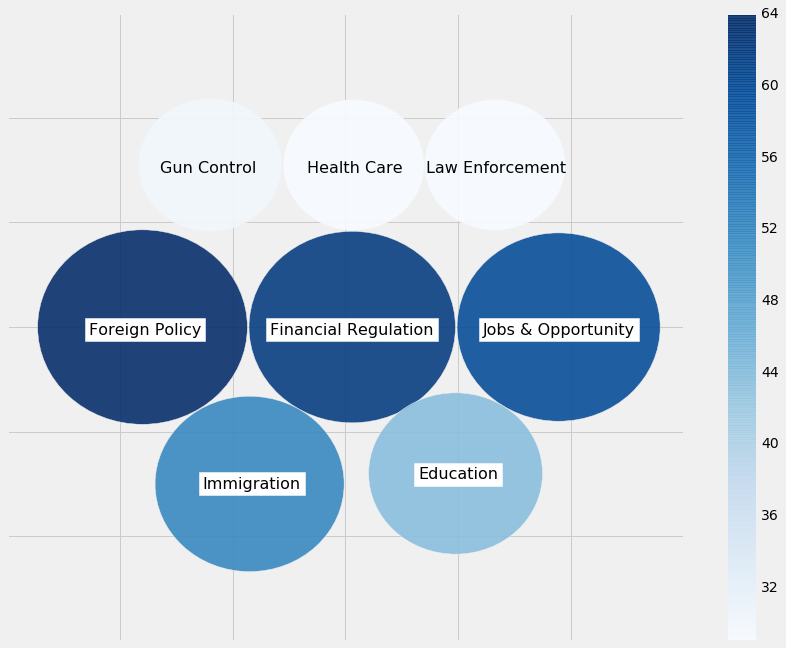

In [24]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(13.5, 10.5))

"""
PRIMARIES:: 8 TOPICS, ngram_range=(1,3)
1) Foreign Policy : 64
2) Financial Regulation : 62
3) Jobs / Opportunity : 60 
4) Immigration : 52
5) Education : 44
6) Gun Control : 30
7) Health Care : 29
8) Law Enforcement : 29
"""

total = 64+62+60+52+44+30+29+29
x1 = 64.0 / total 
x2 = 62.0 / total 
x3 = 60.0 / total 
x4 = 52.0 / total
x5 = 44.0 / total
x6 = 30.0 / total 
x7 = 29.0 / total 
x8 = 29.0 / total

x1_s = sqrt(x1*5)
x2_s = sqrt(x2*5)
x3_s = sqrt(x3*5)
x4_s = sqrt(x4*5)
x5_s = sqrt(x5*5)
x6_s = sqrt(x6*5)
x7_s = sqrt(x7*5)
x8_s = sqrt(x8*5)

patches = []
circles = [(-1.8, 0, x1_s), (-1.8+x1_s*2, 0, x2_s), (-1.8+x1_s*2+x2_s*2, 0, x3_s),
           (-.85, -1.5, x4_s), (-.7+2*x4_s, -1.4, x5_s), (-1.2, 1.55, x6_s),
           (-1.2+2*x6_s, 1.55, x7_s), (-1.2+2*x6_s+2*x7_s, 1.55, x8_s)]
for x1, y1, r in circles:
    circle = Circle((x1, y1), r)
    patches.append(circle)
ax.set_ylim([-3,3])
ax.set_xlim([-3,3])

colors = np.array([64,62,60,52,44,30,29,29])

p = PatchCollection(patches, cmap=matplotlib.cm.Blues, alpha=.9)
p.set_array(np.array(colors))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.add_collection(p)
plt.colorbar(p)

ax.text(.14, .6,'Foreign Policy', ha='center', va='center', transform=ax1.transAxes, fontsize=16, backgroundcolor='white', color = 'black')
ax.text(.47, .6,'Financial Regulation', ha='center', va='center', transform=ax1.transAxes, fontsize=16,backgroundcolor='white', color = 'black')
ax.text(.8, .6,'Jobs & Opportunity', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black', backgroundcolor='white')
ax.text(.31, .27,'Immigration', ha='center', va='center', transform=ax1.transAxes, fontsize=16,backgroundcolor='white', color = 'black')
ax.text(.64, .29,'Education', ha='center', va='center', transform=ax1.transAxes, fontsize=16, backgroundcolor='white', color = 'black')
ax.text(.24, .95,'Gun Control', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')
ax.text(.475, .95,'Health Care', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')
ax.text(.7, .95,'Law Enforcement', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')

plt.savefig('graphs/clinton_p_q4.eps', format='eps')

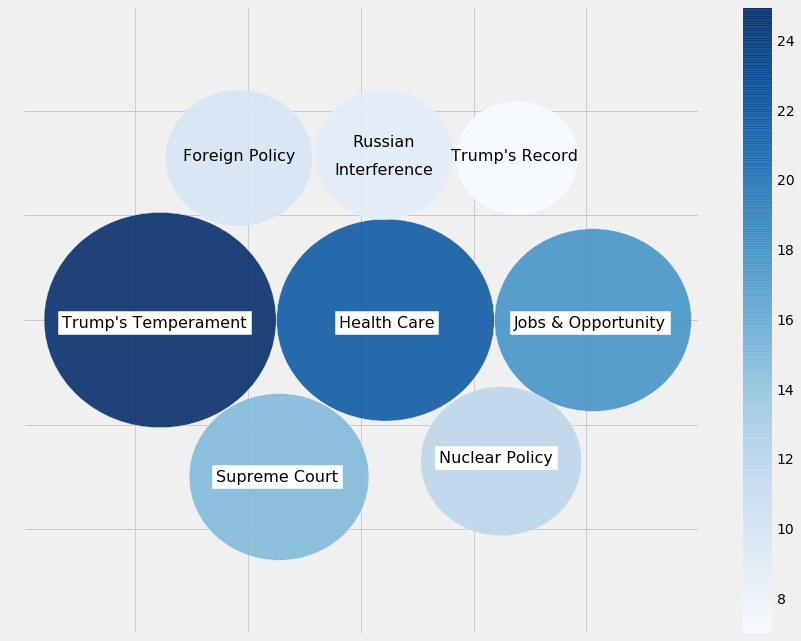

In [26]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(13.5, 10.5))

"""
GE:: 8 TOPICS, ngram_range=(1,1)
0) Russian Intervention
1) Healthcare
2) Foreign Policy
3) Supreme Court
4) Donald’s Temperament
5) Nuclear Policy
6) Jobs & Opportunity
7) Donald’s Record

Counter({4: 25, 1: 22, 6: 18, 3: 15, 5: 12, 2: 10, 0: 9, 7: 7})
"""

total = 25+22+18+15+12+10+9+7
x1 = 25.0 / total 
x2 = 22.0 / total 
x3 = 18.0 / total 
x4 = 15.0 / total
x5 = 12.0 / total
x6 = 10.0 / total 
x7 = 9.0 / total 
x8 = 7.0 / total

x1_s = sqrt(x1*5)
x2_s = sqrt(x2*5)
x3_s = sqrt(x3*5)
x4_s = sqrt(x4*5)
x5_s = sqrt(x5*5)
x6_s = sqrt(x6*5)
x7_s = sqrt(x7*5)
x8_s = sqrt(x8*5)

patches = []
circles = [(-1.78, 0, x1_s), (-1.84+x1_s*2, 0, x2_s), (-1.93+x1_s*2+x2_s*2, 0, x3_s),
           (-.725, -1.5, x4_s), (-.35+2*x4_s, -1.35, x5_s), (-1.08, 1.55, x6_s),
           (-1.1+2*x6_s, 1.58, x7_s), (-1.15+2*x6_s+2*x7_s, 1.55, x8_s)]
for x1, y1, r in circles:
    circle = Circle((x1, y1), r)
    patches.append(circle)
ax.set_ylim([-3,3])
ax.set_xlim([-3,3])

colors = np.array([25, 22, 18, 15, 12, 10, 9, 7])

p = PatchCollection(patches, cmap=matplotlib.cm.Blues, alpha=.9)
p.set_array(np.array(colors))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.add_collection(p)
plt.colorbar(p)

ax.text(.155, .6,'Trump\'s Temperament', ha='center', va='center', transform=ax1.transAxes, fontsize=16, backgroundcolor='white', color = 'black')
ax.text(.525, .6,'Health Care', ha='center', va='center', transform=ax1.transAxes, fontsize=16,backgroundcolor='white', color = 'black')
ax.text(.85, .6,'Jobs & Opportunity', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black', backgroundcolor='white')
ax.text(.35, .27,'Supreme Court', ha='center', va='center', transform=ax1.transAxes, fontsize=16,backgroundcolor='white', color = 'black')
ax.text(.7, .31,'Nuclear Policy', ha='center', va='center', transform=ax1.transAxes, fontsize=16, backgroundcolor='white', color = 'black')
ax.text(.29, .96,'Foreign Policy', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')
ax.text(.52, .99,'Russian', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')
ax.text(.52, .93,'Interference', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')
ax.text(.73, .96,'Trump\'s Record', ha='center', va='center', transform=ax1.transAxes, fontsize=16, color = 'black')

plt.savefig('graphs/clinton_g_q4.eps', format='eps')

### ADDITIONAL ELECTION WORK

In [92]:
def print_summary(cand1_p, cand1_g, cand2_p, cand2_g): 
    c1_p_avg = calc_avg(cand1_p)
    c1_g_avg = calc_avg(cand1_g)

    c2_p_avg = calc_avg(cand2_p)
    c2_g_avg = calc_avg(cand2_g)
    
    print "C1\nPrimary Average: {0}\nGeneral Election Average: {1}\nDifference: {2}".format(c1_p_avg, c1_g_avg, c1_g_avg - c1_p_avg)
    print ""
    print "C2\nPrimary Average: {0}\nGeneral Election Average: {1}\nDifference: {2}".format(c2_p_avg, c2_g_avg, c2_g_avg - c2_p_avg)

In [93]:
#Subjectivity

#2016
c_p_s = [0.46059628777, 0.473386814837, 0.480774694166, 0.474977908127, 0.440111390254, 0.482383309171, 0.455660664221, 0.479662342358, 0.490279415132]
t_p_s = [0.502557720058, 0.510390216961, 0.520650906522, 0.522131608686, 0.524993261456, 0.525073009733, 0.501029188989,  0.491280828439, 0.515618648135, 0.492371497168, 0.533245212465]
c_g_s = [0.47652154346835224, 0.4895848559809599, 0.4989739504494516]
t_g_s = [0.5252667898750849, 0.5270328008493402, 0.4988171517237778]


#2008
o_p_s = [0.4481994249963001, 0.4610937001594894, 0.47012620069487027, 0.43254672677749617, 0.4301584864084864, 0.42321861670075905, 0.49369700717752674, 0.5099038945687884, 0.4753041245221339, 0.46942861072423087, 0.46949756584605085, 0.4585662356488348]
o_g_s = [0.5012525910646998, 0.4979160907120092, 0.4738680847622132]
m_p_s = [0.4867121586926781, 0.42279216814931103, 0.47655762696085274, 0.47080662758294334, 0.4363227513227513, 0.4817316017316017, 0.4597903639570307, 0.4761259419592754, 0.5030701177821597, 0.4589711943307832, 0.4894156818181817, 0.5237531304783368]
m_g_s = [0.48567682496330583, 0.44410868777460694, 0.49100145299914383]


#2000
g_p_s = [0.45342739983805813, 0.4424409129964683, 0.38485970819304144, 0.43409748819918303, 0.45550906166765187, 0.45099620544064994, 0.43167741903158574, 0.4231985175154934]
g_g_s = [0.4510535971349924, 0.4912809541879312, 0.41944179845396884]
b_p_s = [0.4523793556170605, 0.5145454223356009, 0.4904942279942281, 0.4683694083694085, 0.5259632860777896, 0.5045898468815135, 0.5105720026687769, 0.5270297633712268, 0.4876696542893724]
b_g_s = [0.4773907540066076, 0.5175823268896089, 0.5033828138655723]


print "Subjectivity Data"
print '2016\n-----'
print_summary(c_p_s, c_g_s, t_p_s, t_g_s)
print ""

print '2008\n-----'
print_summary(o_p_s, o_g_s, m_p_s, m_g_s)
print ""

print '2000\n-----'
print_summary(g_p_s, g_g_s, b_p_s, b_g_s)

Subjectivity Data
2016
-----
C1
Primary Average: 0.470870314004
General Election Average: 0.488360116633
Difference: 0.0174898026289

C2
Primary Average: 0.51266746351
General Election Average: 0.517038914149
Difference: 0.00437145063922

2008
-----
C1
Primary Average: 0.461811716185
General Election Average: 0.491012255513
Difference: 0.0292005393276

C2
Primary Average: 0.473837447064
General Election Average: 0.473595655246
Difference: -0.00024179181814

2000
-----
C1
Primary Average: 0.43452583911
General Election Average: 0.453925449926
Difference: 0.0193996108154

C2
Primary Average: 0.497956996401
General Election Average: 0.499451964921
Difference: 0.00149496852004


In [94]:
#Positivity

#2016
c_p_nltk = [0.510442829001] 
c_g_nltk = [0.514051874171]
t_p_nltk = [0.428836133066] 
t_g_nltk = [0.409837037776]

#2008
o_p_nltk = [0.491137918937]
o_g_nltk = [0.462950445886]
m_p_nltk = [0.52272086585]
m_g_nltk = [0.483700920386]

#2000
g_p_nltk = [0.502467488057]
g_g_nltk = [0.475762740501]
b_p_nltk = [0.496687839674]
b_g_nltk = [0.46655928981]

print "Positivity Data"
print '2016\n-----'
print_summary(c_p_nltk, c_g_nltk, t_p_nltk, t_g_nltk)
print ""

print '2008\n-----'
print_summary(o_p_nltk, o_g_nltk, m_p_nltk, m_g_nltk)
print ""

print '2000\n-----'
print_summary(g_p_nltk, g_g_nltk, b_p_nltk, b_g_nltk)

Positivity Data
2016
-----
C1
Primary Average: 0.510442829001
General Election Average: 0.514051874171
Difference: 0.00360904517

C2
Primary Average: 0.428836133066
General Election Average: 0.409837037776
Difference: -0.01899909529

2008
-----
C1
Primary Average: 0.491137918937
General Election Average: 0.462950445886
Difference: -0.028187473051

C2
Primary Average: 0.52272086585
General Election Average: 0.483700920386
Difference: -0.039019945464

2000
-----
C1
Primary Average: 0.502467488057
General Election Average: 0.475762740501
Difference: -0.026704747556

C2
Primary Average: 0.496687839674
General Election Average: 0.46655928981
Difference: -0.030128549864


In [95]:
#Assertiveness

#2016
c_p_f = [0.11, 0.0, 0.06, -0.05, -0.03, -0.04, -0.01, -0.03, -.02]
c_g_f = [-.09, -.11, -.11]
t_p_f = [0.15, 0.15, 0.03, 0.05, 0.11, 0.15, 0.06, 0.18, 0.24, 0.29, 0.13]
t_g_f = [0.09, .11, .11]

#2008
o_p_f = [.03, -.02, .06, 0, .02, 0, .04, .09, .06, .04, -.05, .02]
o_g_f = [0, .01, -.07]
m_p_f = [.01, -.01, .01, -.01, -.03, .04, -.03, 0, .02, .04, .06, .11]
m_g_f = [0, .01, .07]

#2000
g_p_f = [.22,.06,.04, .07, .04, .01, .04, .03]
g_g_f = [-.04, -.08, .03]
b_p_f = [.01, .02, .09, .05, .15, .04, .03, .08, .11]
b_g_f = [.04, .08, -.03]

print "Assertiveness Data"
print '2016\n-----'
print_summary(c_p_f, c_g_f, t_p_f, t_g_f)
print ""

print '2008\n-----'
print_summary(o_p_f, o_g_f, m_p_f, m_g_f)
print ""

print '2000\n-----'
print_summary(g_p_f, g_g_f, b_p_f, b_g_f)

Assertiveness Data
2016
-----
C1
Primary Average: -0.00111111111111
General Election Average: -0.103333333333
Difference: -0.102222222222

C2
Primary Average: 0.14
General Election Average: 0.103333333333
Difference: -0.0366666666667

2008
-----
C1
Primary Average: 0.0241666666667
General Election Average: -0.02
Difference: -0.0441666666667

C2
Primary Average: 0.0175
General Election Average: 0.0266666666667
Difference: 0.00916666666667

2000
-----
C1
Primary Average: 0.06375
General Election Average: -0.03
Difference: -0.09375

C2
Primary Average: 0.0644444444444
General Election Average: 0.03
Difference: -0.0344444444444
